In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
df = pd.read_csv('synthetic_HR_dataset.csv')

In [36]:
df.head()

,Employee_ID,Name,Department,Date_of_Joining,Age,Gender,Salary,Experience_Years,Last_Performance_Score,Attrition,City
0,1574,Caleb,Marketing,2029-07-21,58,Other,65724,0,3.1,No,Chennai
1,2612,Christopher,Marketing,2017-07-11,56,Male,55386,8,2.9,Yes,Chennai
2,2769,Dale,HR,2015-10-06,31,Male,86909,10,3.3,No,Bangalore
3,1201,Frank,Marketing,2016-05-31,34,Female,36725,9,3.1,No,Bangalore
4,1463,Eric,IT,2021-02-06,34,NaN,98698,4,2.2,Yes,Mumbai


In [37]:
df.shape

(1007, 11)

In [38]:
df.describe()

,Employee_ID,Age,Salary,Experience_Years,Last_Performance_Score
count,1007.000000,1007.000000,1007.000000,1007.000000,960.000000
mean,1988.876862,40.825223,85142.279047,4.720953,3.482396
std,568.468188,12.550623,93155.765378,3.053953,0.871476
min,1000.000000,15.000000,30031.000000,0.000000,2.000000
25%,1506.500000,31.000000,51046.500000,2.000000,2.700000
50%,1969.000000,40.000000,73006.000000,5.000000,3.400000
75%,2478.500000,50.000000,98164.500000,7.000000,4.200000
max,2999.000000,100.000000,1000000.000000,10.000000,5.000000


# Identifying and Handling Null values

In [39]:
df.isnull().sum()

Employee_ID                 0
Name                        0
Department                  0
Date_of_Joining             0
Age                         0
Gender                    259
Salary                      0
Experience_Years            0
Last_Performance_Score     47
Attrition                   0
City                      162
dtype: int64

In [40]:
mode_val = df['Gender'].mode()
mode_val

0    Male
Name: Gender, dtype: object

In [41]:
# Fill nulls with mode
df['Gender'] = df['Gender'].fillna('Male')

In [42]:
df.isnull().sum()

Employee_ID                 0
Name                        0
Department                  0
Date_of_Joining             0
Age                         0
Gender                      0
Salary                      0
Experience_Years            0
Last_Performance_Score     47
Attrition                   0
City                      162
dtype: int64

In [43]:
median_score = df['Last_Performance_Score'].median()
df['Last_Performance_Score'] = df['Last_Performance_Score'].fillna(median_score)

In [44]:
df.isnull().sum()

Employee_ID                 0
Name                        0
Department                  0
Date_of_Joining             0
Age                         0
Gender                      0
Salary                      0
Experience_Years            0
Last_Performance_Score      0
Attrition                   0
City                      162
dtype: int64

In [45]:
most_common_city = df['City'].mode()[0]
df['City'] = df['City'].fillna(most_common_city)

In [46]:
df.isnull().sum()

Employee_ID               0
Name                      0
Department                0
Date_of_Joining           0
Age                       0
Gender                    0
Salary                    0
Experience_Years          0
Last_Performance_Score    0
Attrition                 0
City                      0
dtype: int64

# Identifying and Handling Duplicate records

In [47]:
df.duplicated().sum()

np.int64(9)

In [48]:
df[df.duplicated()]

,Employee_ID,Name,Department,Date_of_Joining,Age,Gender,Salary,Experience_Years,Last_Performance_Score,Attrition,City
201,2739,Ronald,hr,2019-03-14,29,Male,92562,6,2.2,Yes,Hyderabad
281,2898,Keith,HR,2020-11-27,40,Male,67876,5,4.7,No,Bangalore
500,2603,Shannon,Marketing,2017-11-03,37,Male,96830,8,4.8,Yes,Hyderabad
594,2350,Diana,hr,2019-09-18,53,Male,64917,6,2.3,Yes,Delhi
749,1816,Amanda,Sales,2021-10-09,48,Male,31759,4,4.4,No,Hyderabad
821,2851,Melinda,hr,2018-08-26,48,Male,38387,7,3.2,Yes,Hyderabad
827,2363,Leslie,IT,2020-07-01,43,Male,48851,5,3.0,No,Bangalore
863,2650,Sarah,HR,2020-01-27,32,Other,118514,5,4.0,No,Bangalore
978,1875,Robert,hr,2025-03-27,29,Female,57952,0,2.3,No,Chennai


In [49]:
df = df.drop_duplicates()

In [50]:
df.duplicated().sum()

np.int64(0)

# Identifying and Handling Outliers

In [51]:
df1 = df.copy()

<Axes: xlabel='Age'>

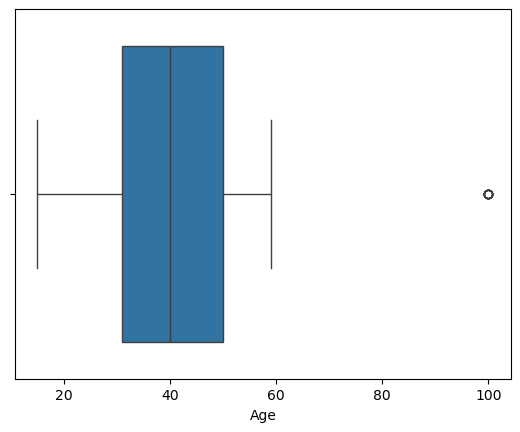

In [52]:
sns.boxplot(x = 'Age', data = df1)

### Deleting records with Outliers

In [53]:
Q1_age = df1['Age'].quantile(0.25)
Q3_age = df1['Age'].quantile(0.75)
IQR_age = Q3_age - Q1_age
df1 = df1[(df['Age'] >= Q1_age - 1.5 * IQR_age) & (df1['Age'] <= Q3_age + 1.5 * IQR_age)]

<Axes: xlabel='Age'>

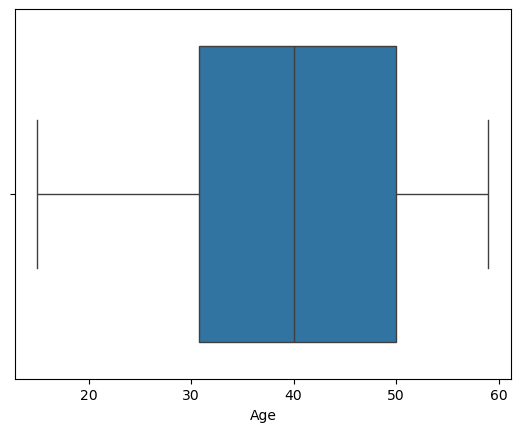

In [54]:
sns.boxplot(x = 'Age', data = df1)

<Axes: xlabel='Salary'>

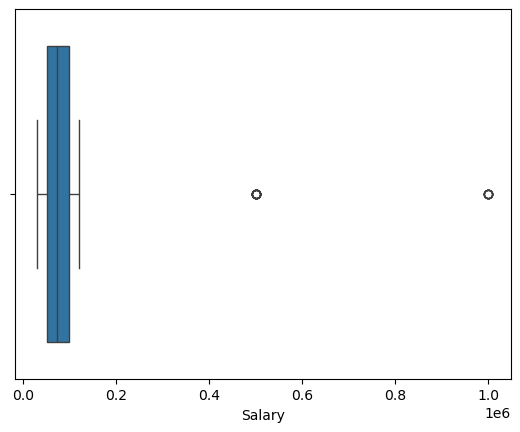

In [55]:
sns.boxplot(x = 'Salary', data = df1)

In [56]:
Q1_salary = df1['Salary'].quantile(0.25)
Q3_salary = df1['Salary'].quantile(0.75)
IQR_salary = Q3_salary - Q1_salary

df1 = df1[(df1['Salary'] >= Q1_salary - 1.5 * IQR_salary) & (df1['Salary'] <= Q3_salary + 1.5 * IQR_salary)]

<Axes: xlabel='Salary'>

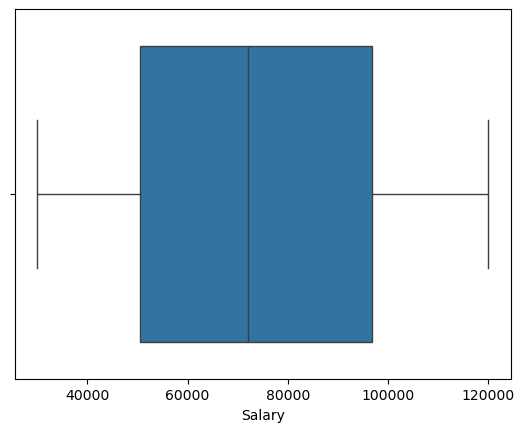

In [57]:
sns.boxplot(x = 'Salary', data = df1)

In [58]:
df1.shape

(970, 11)

### Repalcing Outliers with median values

In [59]:
df2 = df.copy()
medain_age = df2['Age'].median()
medain_age

40.0

<Axes: xlabel='Age'>

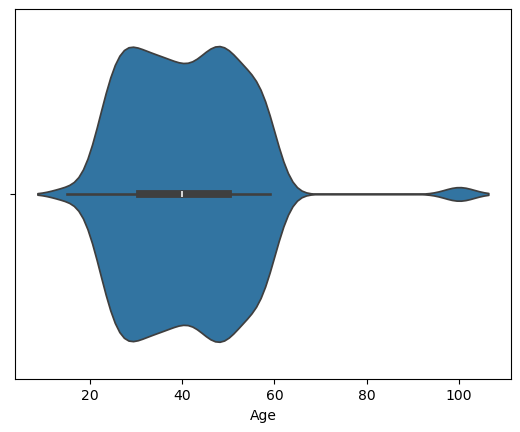

In [60]:
sns.violinplot(x = 'Age' ,data = df2)

In [61]:
df2.shape

(998, 11)

In [62]:
df2.loc[(df2['Age'] < Q3_age - 1.5 * IQR_age) | (df2['Age'] > Q1_age + 1.5 * IQR_age),'Age'] = medain_age

<Axes: xlabel='Age'>

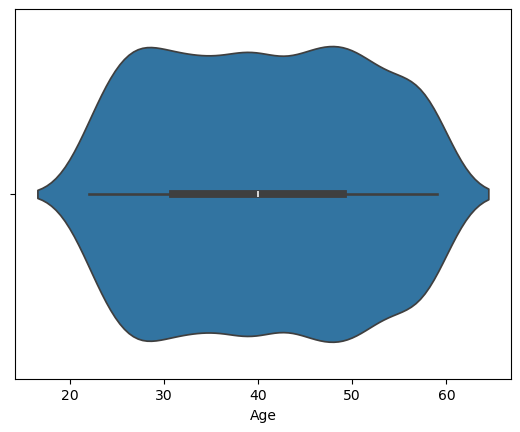

In [63]:
sns.violinplot(x = 'Age',data = df2)

In [64]:
df2.shape

(998, 11)

In [65]:
median_sal = df['Salary'].median()
median_sal

73080.0

<Axes: xlabel='Salary'>

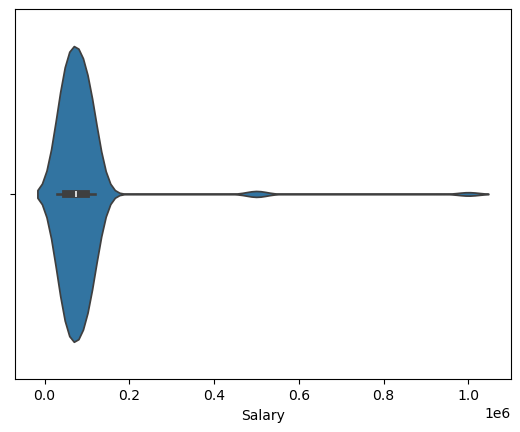

In [66]:
sns.violinplot(x = 'Salary', data = df2)

In [69]:
df2.loc[(df2['Salary'] < Q1_salary - 1.5 * IQR_salary) | (df2['Salary'] > Q3_salary + 1.5 * IQR_salary),'Salary'] = median_sal

<Axes: xlabel='Salary'>

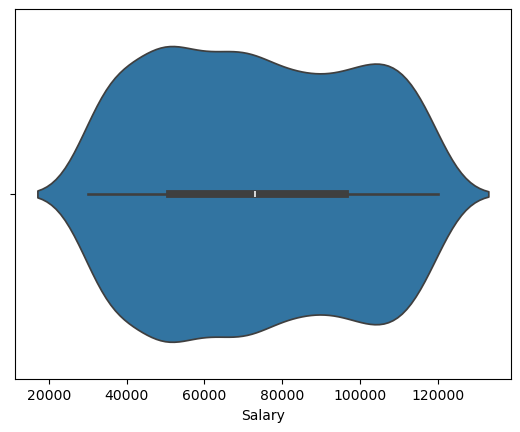

In [70]:
sns.violinplot(x = 'Salary', data = df2)

In [71]:
df2.shape

(998, 11)